<h1>Project 18</h1>


<h2> Country wide Covid19 Dataset</h2>

<img src="https://cdn.pixabay.com/photo/2016/03/29/08/48/project-1287781_1280.jpg">

***First importing necessary libraries***

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

***Importing data which is in csv format***


In [2]:
df=pd.read_csv('Country_wide.csv',parse_dates=["Date"])
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


<h2>Start of EDA process</h2>

***Checking data types and null count of the columns***


In [3]:
df.shape

(6603, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 6603 non-null   datetime64[ns]
 1   Country              6603 non-null   object        
 2   Population           6603 non-null   int64         
 3   Total Tests          5505 non-null   float64       
 4   Total Cases          6554 non-null   float64       
 5   Total Deaths         5367 non-null   float64       
 6   Total Recovered      6318 non-null   float64       
 7   Serious or Critical  4117 non-null   float64       
 8   Active Cases         6544 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 464.4+ KB


In [5]:
df.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

We see that there are multiple values missing, lets handle them first

As all the missing values belong to columns with datatype as float, we will replace the nan values with mean value of that column

In [6]:
df["Total Tests"].fillna(df["Total Tests"].mean(),inplace=True)
df["Total Cases"].fillna(df["Total Cases"].mean(),inplace=True)
df["Total Deaths"].fillna(df["Total Deaths"].mean(),inplace=True)
df["Total Recovered"].fillna(df["Total Recovered"].mean(),inplace=True)
df["Active Cases"].fillna(df["Active Cases"].mean(),inplace=True)
df["Serious or Critical"].fillna(df["Serious or Critical"].mean(),inplace=True)

In [7]:
df.isnull().sum()

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

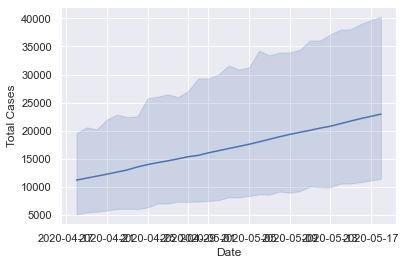

In [8]:
sns.lineplot(x="Date",y="Total Cases",data=df)

In [9]:
df_group= df.groupby(['Country'],as_index=False).mean()
df_group.max()

Country                   Zimbabwe
Population              1439323776
Total Tests            7.48389e+06
Total Cases            1.16763e+06
Total Deaths               67819.1
Total Recovered             193706
Serious or Critical        15745.2
Active Cases                906949
dtype: object

In [10]:
df_group.min()

Country                Afghanistan
Population                     801
Total Tests                     36
Total Cases                      1
Total Deaths                     1
Total Recovered                  2
Serious or Critical              1
Active Cases                     0
dtype: object

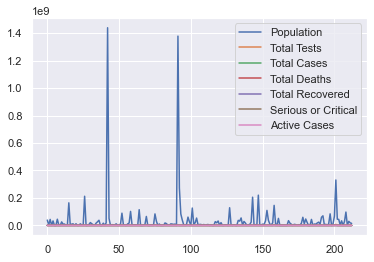

In [11]:
df_group.plot()

In [12]:
df['Country'].unique

<bound method Series.unique of 0                         USA
1                      Russia
2                       Spain
3                      Brazil
4                          UK
                ...          
6598                St. Barth
6599           Western Sahara
6600                 Anguilla
6601                  Lesotho
6602    Saint Pierre Miquelon
Name: Country, Length: 6603, dtype: object>

We can see that all the value in country is unique, there is no non unique value or duplicates

In [13]:
df.drop(['Date','Country'],axis=1,inplace=True)
df.head()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,330774664,3722145.0,738792.0,39014.0,68269.000000,13551.0,631509.0
1,145927292,1831892.0,36793.0,313.0,3057.000000,8.0,33423.0
2,46752703,930230.0,194416.0,20043.0,74797.000000,7371.0,99576.0
3,212380932,62985.0,36722.0,2361.0,14026.000000,6634.0,20335.0
4,67844241,460437.0,114217.0,15464.0,5855.424185,1559.0,98409.0


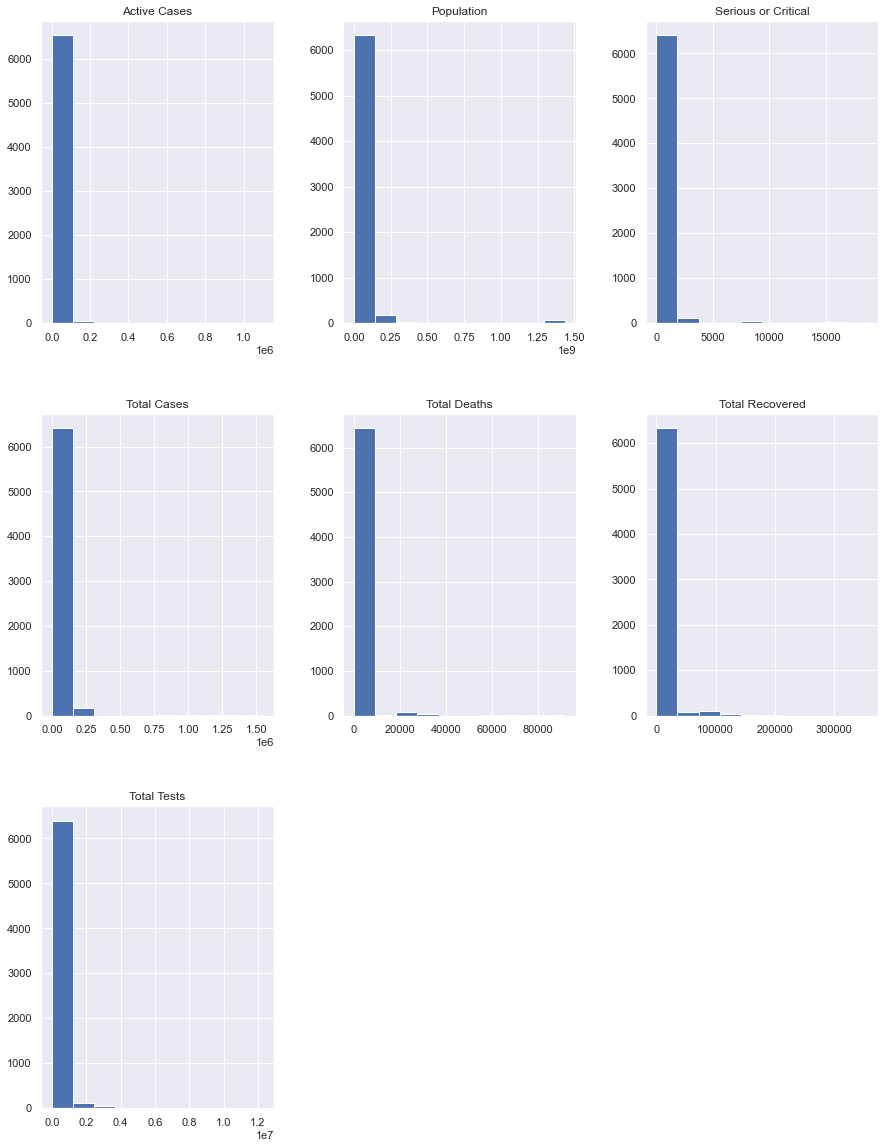

In [14]:
df.hist(figsize=(15,20))
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


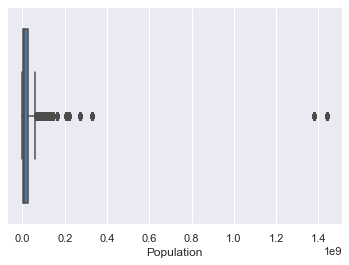

AxesSubplot(0.125,0.125;0.775x0.755)


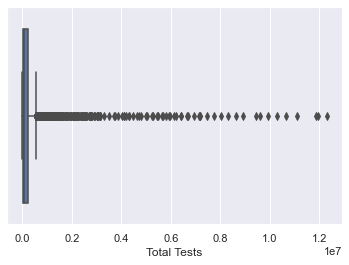

AxesSubplot(0.125,0.125;0.775x0.755)


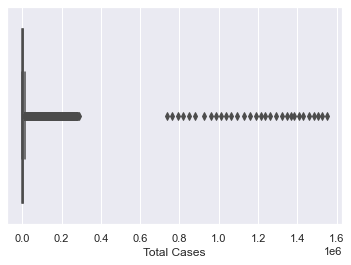

AxesSubplot(0.125,0.125;0.775x0.755)


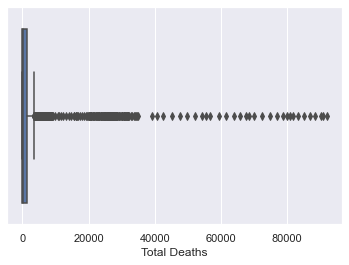

AxesSubplot(0.125,0.125;0.775x0.755)


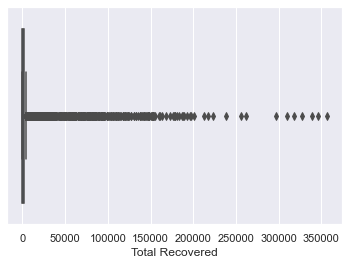

AxesSubplot(0.125,0.125;0.775x0.755)


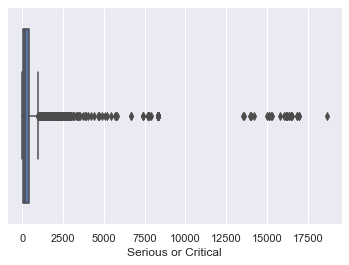

AxesSubplot(0.125,0.125;0.775x0.755)


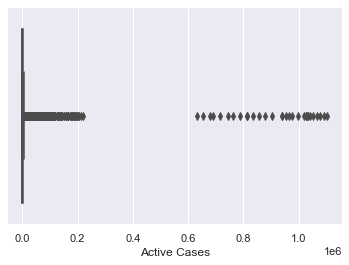

In [15]:
 for i in df.columns:
    print(sns.boxplot(x=df[i]))
    plt.show()

***In this dataset we will try to predict number of Total Deaths***

We will consider column Total Deaths as our target variable

***Lets find correlation***

In [16]:
df.corr()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
Population,1.000000,0.223735,0.225844,0.176773,0.309361,0.170461,0.179359
Total Tests,0.223735,1.000000,0.896328,0.803680,0.795205,0.728773,0.853809
Total Cases,0.225844,0.896328,1.000000,0.930952,0.821121,0.881620,0.975361
Total Deaths,0.176773,0.803680,0.930952,1.000000,0.794887,0.822177,0.879732
Total Recovered,0.309361,0.795205,0.821121,0.794887,1.000000,0.707686,0.687265
Serious or Critical,0.170461,0.728773,0.881620,0.822177,0.707686,1.000000,0.869204
Active Cases,0.179359,0.853809,0.975361,0.879732,0.687265,0.869204,1.000000


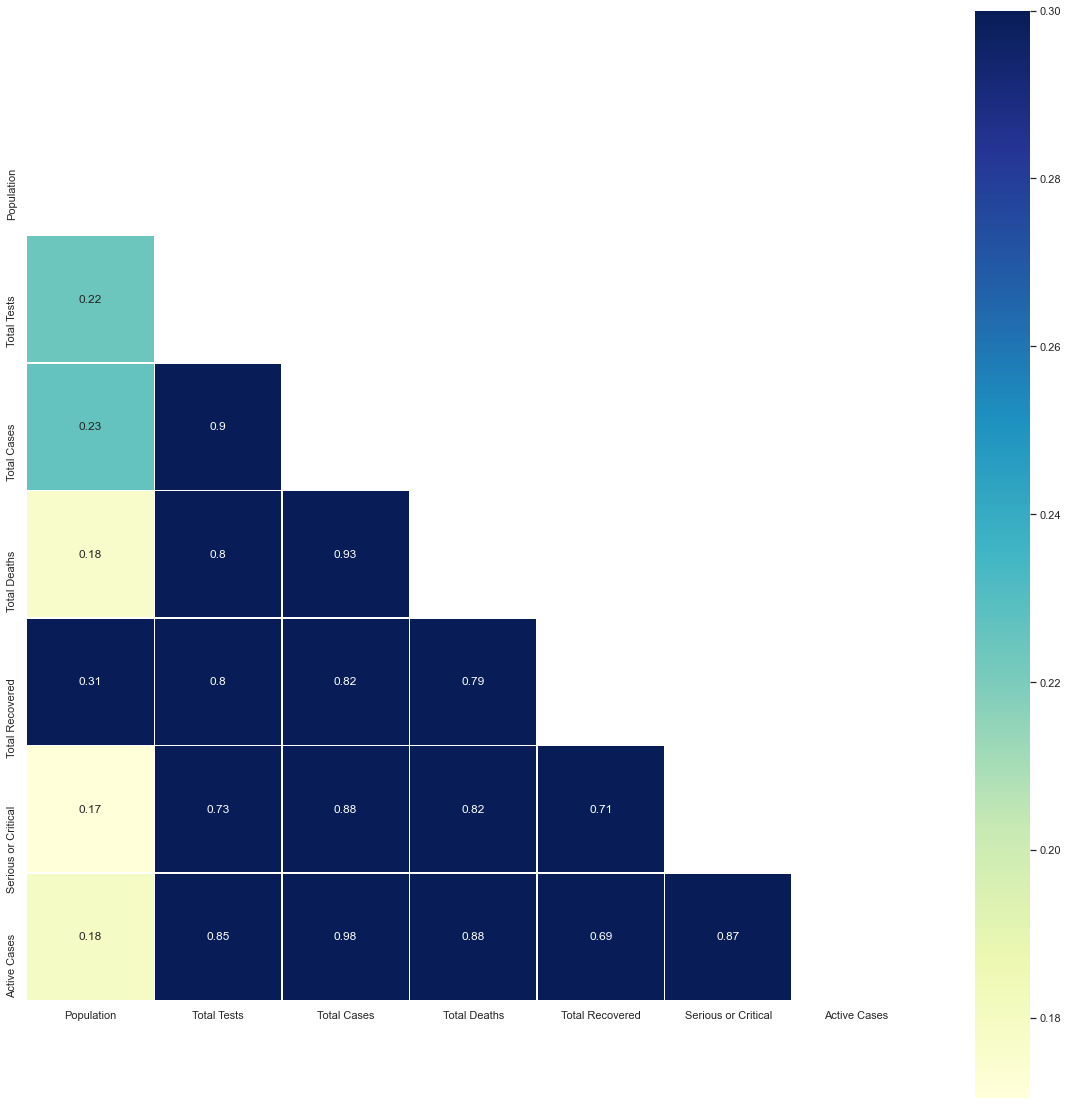

In [17]:
import numpy as np
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True, linewidths=0.5,cmap="YlGnBu")

***Lets visualize our input variables with our output variable***

AxesSubplot(0.125,0.125;0.775x0.755)


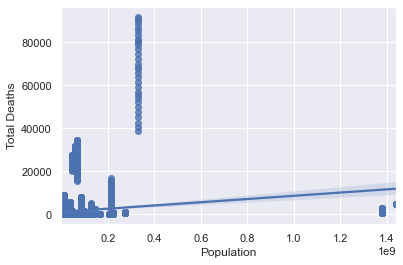

AxesSubplot(0.125,0.125;0.775x0.755)


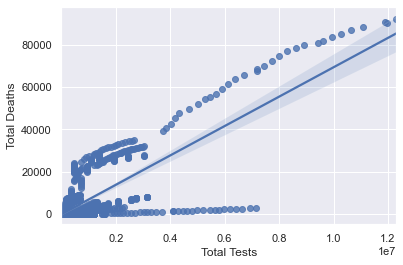

AxesSubplot(0.125,0.125;0.775x0.755)


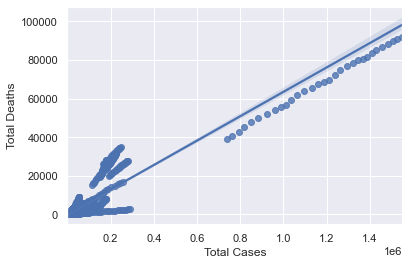

AxesSubplot(0.125,0.125;0.775x0.755)


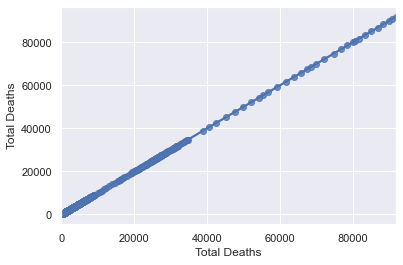

AxesSubplot(0.125,0.125;0.775x0.755)


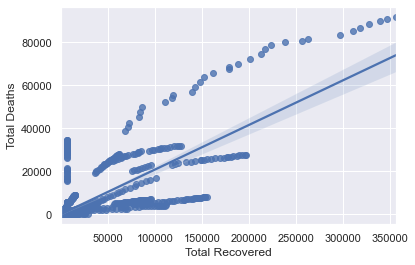

AxesSubplot(0.125,0.125;0.775x0.755)


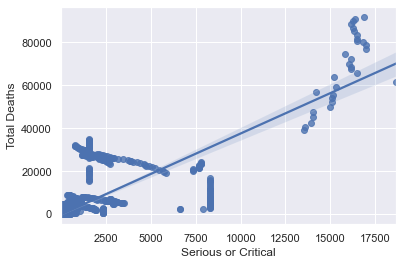

AxesSubplot(0.125,0.125;0.775x0.755)


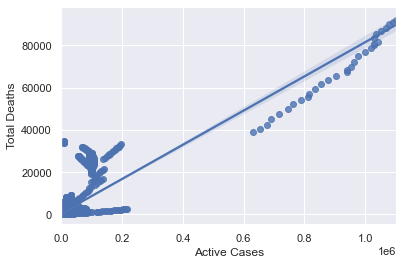

In [18]:
for i in df.columns:
    print(sns.regplot(x=df[i], y='Total Deaths', data=df))
    plt.show()

we see that all the variablea are positively correlated some are stronger and some are moderate

***Lets separate our dependent variable Y, in this dataset Total Deaths and our independent variable X***

In [19]:
y=df[['Total Deaths']]
y.head()

,Total Deaths
0,39014.0
1,313.0
2,20043.0
3,2361.0
4,15464.0


In [20]:
x=df.drop(['Total Deaths'],axis=1)
x.head()

,Population,Total Tests,Total Cases,Total Recovered,Serious or Critical,Active Cases
0,330774664,3722145.0,738792.0,68269.000000,13551.0,631509.0
1,145927292,1831892.0,36793.0,3057.000000,8.0,33423.0
2,46752703,930230.0,194416.0,74797.000000,7371.0,99576.0
3,212380932,62985.0,36722.0,14026.000000,6634.0,20335.0
4,67844241,460437.0,114217.0,5855.424185,1559.0,98409.0


***Lets check for skewness in our input features***

In [21]:
x.skew()

Population              8.743503
Total Tests             9.340104
Total Cases            12.079982
Total Recovered         7.220713
Serious or Critical     9.199670
Active Cases           13.301517
dtype: float64

***Lets eliminate the skewness in our input attributes***

In [22]:
for i in x.skew().index:
    if x.skew().loc[i]>0.55:
        x[i]=np.log1p(x[i])

In [23]:
x.skew()

Population            -0.672563
Total Tests           -0.534042
Total Cases            0.172963
Total Recovered        0.246400
Serious or Critical   -0.234521
Active Cases           0.063730
dtype: float64

We can see that skewness is significantly reduced

***Lets scale our data using standard scalar***

In [24]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)
df_x=ss.transform(x)
x=pd.DataFrame(df_x,columns=x.columns)
x.head()

,Population,Total Tests,Total Cases,Total Recovered,Serious or Critical,Active Cases
0,1.720170,1.940501,2.563917,2.097924,2.446096,2.620279
1,1.400346,1.657396,1.474040,0.921879,-0.920197,1.632454
2,0.955493,1.386781,2.078866,2.132505,2.165990,1.999390
3,1.547012,0.311578,1.473338,1.498681,2.117532,1.465439
4,1.101014,1.105951,1.885612,1.167931,1.451514,1.995428


In [25]:
y.head()

,Total Deaths
0,39014.0
1,313.0
2,20043.0
3,2361.0
4,15464.0


We have both of input and output attributes cleaned and in desired format

<h2>End of EDA Process</h2>

Lets start Building models to make predictions and find the model that works best on our dataset

<h2>Start of Machine Learning Process</h2>


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
DTR=DecisionTreeRegressor(random_state=3)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=3)
RFR=RandomForestRegressor(random_state=3)
GBR=GradientBoostingRegressor(random_state=3)
models=[]
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*-----------------------------*',name,'*------------------------------*')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2*100)
    R2_score.append(r2*100)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    score= abs(cross_val_score(model,x,y,cv=10,scoring='r2')).mean()
    print('Cross_Val_Score = ',score*100)
    cvs.append(score*100)
    print('\n')
result = pd.DataFrame({'Regression Model': Model, 'R2 Score': R2_score ,'Mean Squared Error' :MSE,'Cross Validation score':cvs})
result

*-----------------------------* Lasso *------------------------------*
Lasso()
R2_score =  22.319403784791458
Mean_Squared_Error = 36010919.431311
Cross_Val_Score =  22.894292002363475


*-----------------------------* Ridge *------------------------------*
Ridge()
R2_score =  22.32163756716492
Mean_Squared_Error = 36009883.90170647
Cross_Val_Score =  22.891654897575947


*-----------------------------* ElasticNet *------------------------------*
ElasticNet()
R2_score =  19.866767146262042
Mean_Squared_Error = 37147904.787855834
Cross_Val_Score =  21.883444811432703


*-----------------------------* DecisionTreeRegressor *------------------------------*
DecisionTreeRegressor(random_state=3)
R2_score =  99.82978224146684
Mean_Squared_Error = 78908.99770302806
Cross_Val_Score =  96.95666734450359


*-----------------------------* KNeighborsRegressor *------------------------------*
KNeighborsRegressor()
R2_score =  99.73952564220326
Mean_Squared_Error = 120749.85993354772
Cross_Val_Score

,Regression Model,R2 Score,Mean Squared Error,Cross Validation score
0,Lasso,22.319404,3.601092e+07,22.894292
1,Ridge,22.321638,3.600988e+07,22.891655
2,ElasticNet,19.866767,3.714790e+07,21.883445
3,DecisionTreeRegressor,99.829782,7.890900e+04,96.956667
4,KNeighborsRegressor,99.739526,1.207499e+05,98.788444
5,AdaBoostRegressor,97.559221,1.131489e+06,94.376942
6,RandomForestRegressor,99.854828,6.729841e+04,99.227848
7,GradientBoostingRegressor,99.426505,2.658589e+05,98.923454


I am getting a highest accuracy of 99.85% with RandomForestRegressor, hence I am going to finalize this model

<h2>End of Machine learning Process</h2>


<h1>Now lets save our final model</h1>

In [27]:
import joblib
joblib.dump(DTR,'Country_COVID_19.pkl')

['Country_COVID_19.pkl']

<img src="https://knowledge.wharton.upenn.edu/wp-content/uploads/2020/05/Women-in-data-science.jpg">